In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy.ma as ma
import joblib 
%matplotlib inline
plt.style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import offsetbox

In [2]:
# Loading Test Data
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test_corrected.npy')

print(X_test.shape, t_test.shape)

(2880, 90000) (2880,)


In [3]:
# Inverting colors from black characters on white background --> white characters on black background
data = []
for i in range(len(X_test)):
        X_test[i] = 255 - X_test[i]

# Resizing samples from 300x300 to 30x30 array by taking average of each 10x10 block of pixels
def rebin(a, shape):
    sh = shape[0],a.shape[0]//shape[0],shape[1],a.shape[1]//shape[1]
    return a.reshape(sh).mean(-1).mean(1)

data = []
for i in range(len(X_test)):
    data.append(np.ravel(np.array(rebin(X_test[i].reshape(300,300), (30,30)))))
X_test = np.array(data)

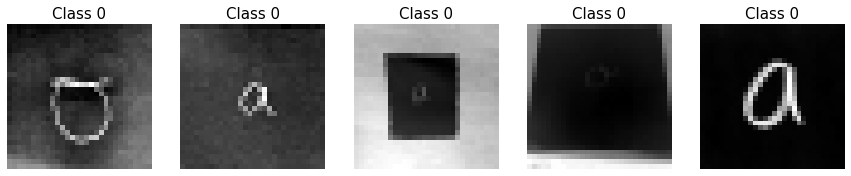

In [4]:
# Displaying some random examples per class
for i in range(1):
    rnd_sample = npr.permutation(np.where(t_test==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(5):
        fig.add_subplot(1,5,j+1)
        plt.imshow(X_test[rnd_sample[j],:].reshape((30,30)),cmap='gray')
        plt.axis('off');plt.title('Class '+str(int(t_test[rnd_sample[j]])),size=15)
    plt.show()

In [5]:
print(X_test.shape, t_test.shape)

(2880, 900) (2880,)


In [6]:
# Load Trained Models
rfe = joblib.load("RFE_LogReg_n100_step25.pkl")

In [7]:
# Scale the data
scaler = joblib.load("scaler.pkl")
X_test_scaled = scaler.transform(X_test)

In [8]:
# Reduce dimensionality in test set with RFE
rfe = joblib.load("RFE_LogReg_n100_step25.pkl")
X_test_reduced = rfe.transform(X_test_scaled) # logistic regression classifier
rfe2 = joblib.load("RFE2_DecisionTree_n100_step25.pkl")
X_test_reduced2 = rfe.transform(X_test_scaled) # decision tree classifier
print(X_test_reduced.shape, X_test_reduced2.shape)

(2880, 100) (2880, 100)


In [9]:
# Reduce dimensionality in test set with PCA
pca = joblib.load("trained_pca.pkl")
X_test_pca = pca.transform(X_test_scaled)
X_test_pca.shape

(2880, 49)


Performance Report: 


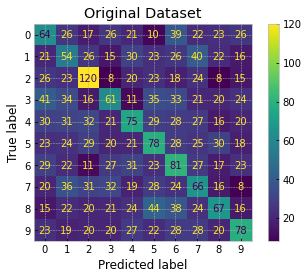

              precision    recall  f1-score   support

         0.0       0.22      0.23      0.23       274
         1.0       0.19      0.20      0.19       273
         2.0       0.37      0.42      0.40       285
         3.0       0.24      0.21      0.22       296
         4.0       0.27      0.24      0.26       309
         5.0       0.25      0.26      0.26       296
         6.0       0.24      0.28      0.26       291
         7.0       0.22      0.24      0.23       280
         8.0       0.28      0.23      0.25       291
         9.0       0.32      0.27      0.29       285

    accuracy                           0.26      2880
   macro avg       0.26      0.26      0.26      2880
weighted avg       0.26      0.26      0.26      2880


Performance Report: 


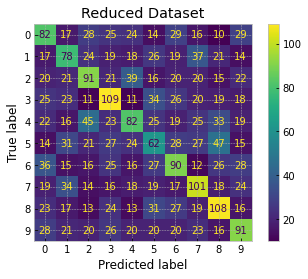

              precision    recall  f1-score   support

         0.0       0.29      0.30      0.29       274
         1.0       0.29      0.29      0.29       273
         2.0       0.32      0.32      0.32       285
         3.0       0.35      0.37      0.36       296
         4.0       0.31      0.27      0.29       309
         5.0       0.23      0.21      0.22       296
         6.0       0.31      0.31      0.31       291
         7.0       0.34      0.36      0.35       280
         8.0       0.35      0.37      0.36       291
         9.0       0.33      0.32      0.32       285

    accuracy                           0.31      2880
   macro avg       0.31      0.31      0.31      2880
weighted avg       0.31      0.31      0.31      2880



In [10]:
# Analyze performance measures for original and reduced datasets
clf_original = joblib.load("DT_original_dataset.pkl")
clf_reduced = joblib.load("DT_reduced_dataset.pkl")
y_test_original = clf_original.predict(X_test_scaled)
y_test_reduced = clf_reduced.predict(X_test_pca)
print('\nPerformance Report: ')
matrix1 = confusion_matrix(t_test, y_test_original)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix1)
cm_display.plot()
cm_display.ax_.set_title("Original Dataset")
plt.show()
print(classification_report(t_test, y_test_original))
print('\nPerformance Report: ')
matrix2 = confusion_matrix(t_test, y_test_reduced)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix2)
cm_display.plot()
cm_display.ax_.set_title("Reduced Dataset")
plt.show()
print(classification_report(t_test, y_test_reduced))

This is actually super cool to see. I'll do more analysis and remark about it in my report but dimensionality reduction clearly reduces overfitting


Performance Report: 


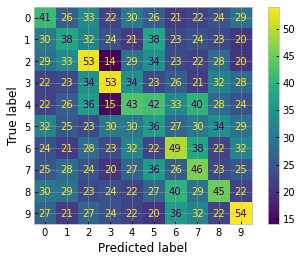

              precision    recall  f1-score   support

         0.0       0.15      0.15      0.15       274
         1.0       0.14      0.14      0.14       273
         2.0       0.17      0.19      0.18       285
         3.0       0.21      0.18      0.19       296
         4.0       0.15      0.14      0.14       309
         5.0       0.12      0.12      0.12       296
         6.0       0.16      0.17      0.16       291
         7.0       0.15      0.16      0.16       280
         8.0       0.16      0.15      0.16       291
         9.0       0.19      0.19      0.19       285

    accuracy                           0.16      2880
   macro avg       0.16      0.16      0.16      2880
weighted avg       0.16      0.16      0.16      2880



In [14]:
final_model = joblib.load("final_model.pkl")
y_test_mla = final_model.predict(X_test_scaled)
print('\nPerformance Report: ')
matrix3 = confusion_matrix(t_test, y_test_mla)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix3)
cm_display.plot()
plt.show()
print(classification_report(t_test, y_test_mla))